In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/weather_classification_data.csv")

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
df.shape

(13200, 11)

In [6]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [8]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Cloud Cover','Season','Location','Weather Type']
# Encode labels of multiple columns at once
for col in cols:
  df[col] = le.fit_transform(df[col])

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

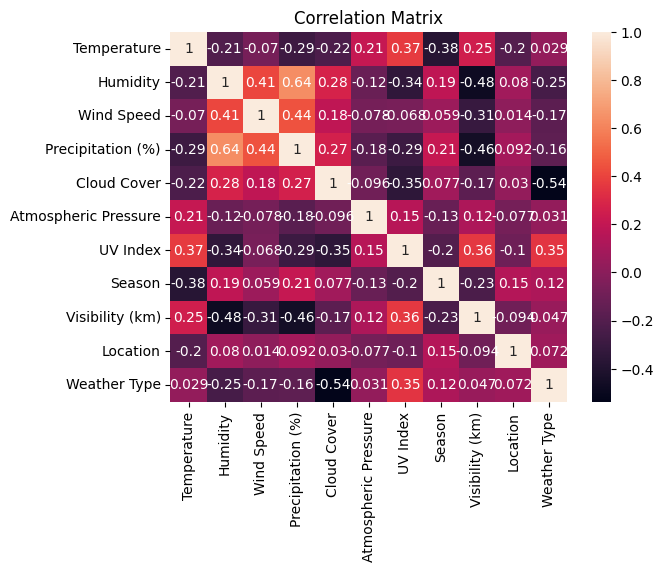

In [11]:
numerical_df = df.select_dtypes(include=["int", "float"])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix')
plt.show()

In [12]:
correlation= df.corr()['Weather Type'].abs()
correlation

Temperature             0.028923
Humidity                0.250558
Wind Speed              0.166485
Precipitation (%)       0.161578
Cloud Cover             0.536681
Atmospheric Pressure    0.030679
UV Index                0.345804
Season                  0.118791
Visibility (km)         0.047448
Location                0.071665
Weather Type            1.000000
Name: Weather Type, dtype: float64

In [13]:
sort_cor = correlation.sort_values(ascending=False)
sort_cor

Weather Type            1.000000
Cloud Cover             0.536681
UV Index                0.345804
Humidity                0.250558
Wind Speed              0.166485
Precipitation (%)       0.161578
Season                  0.118791
Location                0.071665
Visibility (km)         0.047448
Atmospheric Pressure    0.030679
Temperature             0.028923
Name: Weather Type, dtype: float64

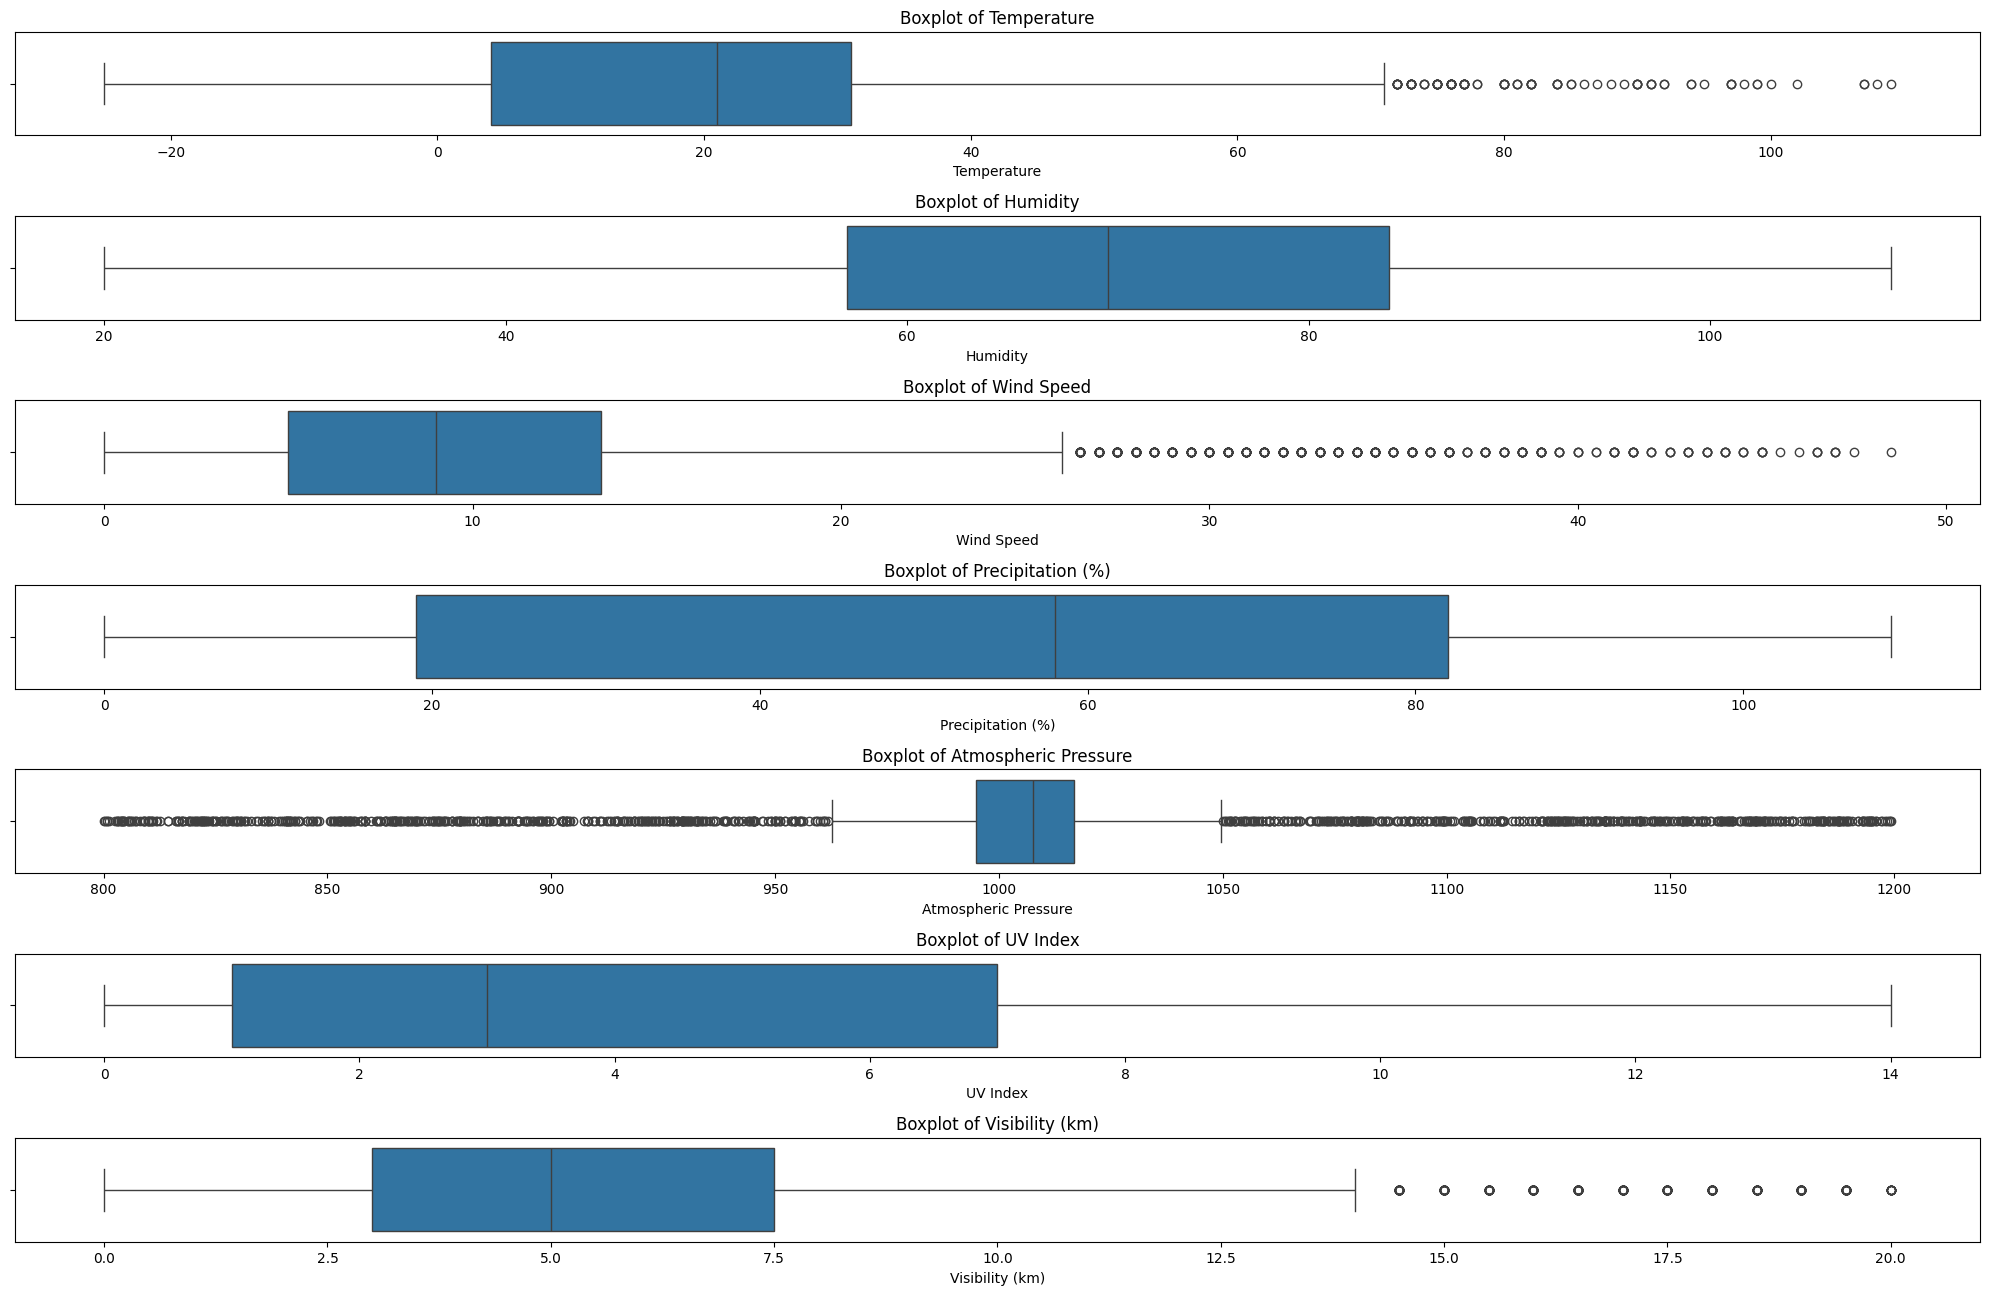

In [14]:
# Set the figure size
plt.figure(figsize=(20, 20))

features=['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index','Visibility (km)']
# Iterate over columns
for i, column in enumerate(features):
    plt.subplot(len(df.columns), 1, i + 1)  # Create subplots
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                    'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Dictionary to store outlier counts
outlier_counts = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    outlier_counts[column] = outlier_count

# Convert the dictionary to a DataFrame for better visualization
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

print(outlier_counts_df)

                 Column  Outlier Count
0           Temperature             92
1              Humidity              0
2            Wind Speed            404
3     Precipitation (%)              0
4  Atmospheric Pressure            927
5              UV Index              0
6       Visibility (km)            383


In [16]:
df.drop('Atmospheric Pressure', axis=1, inplace=True)

In [17]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'UV Index', 'Season', 'Visibility (km)', 'Location',
       'Weather Type'],
      dtype='object')

In [18]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Temperature'] = df['Temperature'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
Q1 = df['Wind Speed'].quantile(0.25)
Q3 = df['Wind Speed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Wind Speed'] = df['Wind Speed'].clip(lower=lower_bound, upper=upper_bound)

In [20]:
Q1 = df['Visibility (km)'].quantile(0.25)
Q3 = df['Visibility (km)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Visibility (km)'] = df['Visibility (km)'].clip(lower=lower_bound, upper=upper_bound)

In [21]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'UV Index', 'Season', 'Visibility (km)', 'Location',
       'Weather Type'],
      dtype='object')

In [22]:
# List of feature columns to standardize
feature_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Cloud Cover',
                'UV Index', 'Season','Visibility (km)', 'Location']

# Standardize features
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize features
df[feature_cols] = scaler.fit_transform(df[feature_cols])

In [23]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location,Weather Type
0,0.404145,0.595506,0.361905,0.752294,1.000000,0.142857,1.000000,0.245614,0.5,1
1,0.663212,0.853933,0.323810,0.651376,1.000000,0.500000,0.333333,0.701754,0.5,0
2,0.569948,0.494382,0.266667,0.146789,0.000000,0.357143,0.333333,0.385965,1.0,3
3,0.652850,0.707865,0.057143,0.752294,0.000000,0.500000,0.333333,0.070175,0.0,3
4,0.538860,0.606742,0.647619,0.605505,0.666667,0.071429,1.000000,0.175439,1.0,1


In [24]:
X=df.drop('Weather Type',axis=1)

In [25]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,UV Index,Season,Visibility (km),Location
0,0.404145,0.595506,0.361905,0.752294,1.000000,0.142857,1.000000,0.245614,0.5
1,0.663212,0.853933,0.323810,0.651376,1.000000,0.500000,0.333333,0.701754,0.5
2,0.569948,0.494382,0.266667,0.146789,0.000000,0.357143,0.333333,0.385965,1.0
3,0.652850,0.707865,0.057143,0.752294,0.000000,0.500000,0.333333,0.070175,0.0
4,0.538860,0.606742,0.647619,0.605505,0.666667,0.071429,1.000000,0.175439,1.0


In [26]:
y=df['Weather Type']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.shape

(9900, 9)

In [29]:
y_train.shape

(9900,)

In [30]:
X_test.shape

(3300, 9)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [32]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train models and evaluate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8503
Decision Tree Accuracy: 0.9003
Random Forest Accuracy: 0.9045
Support Vector Machine Accuracy: 0.9000
K-Nearest Neighbors Accuracy: 0.8894
Gradient Boosting Accuracy: 0.9018


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:15:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9058


In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5]
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200}
Best Accuracy:  0.9103030303030304


In [35]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9646464646464646
Testing Accuracy: 0.9030303030303031


In [40]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_search, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:35:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:42:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:49:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:56:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:03:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-Validation Scores: [0.91174242 0.92083333 0.89659091 0.8969697  0.90530303]
Mean Cross-Validation Score: 0.9062878787878788


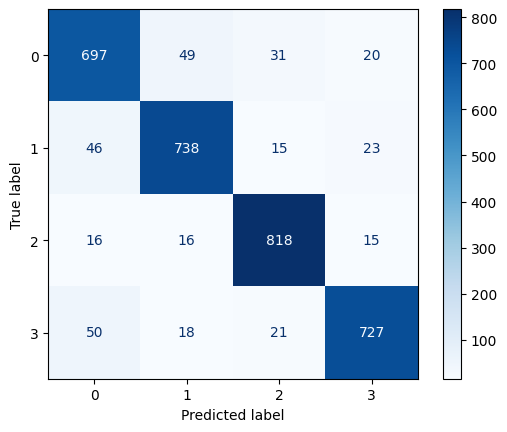

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [42]:
import pickle

In [44]:
# Assuming `grid_search` is your trained model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)
